In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('gemstone.csv')

In [102]:
df.drop(labels='id',axis=1,inplace=True)

In [103]:
X = df.drop(labels='price',axis=1)
y = df['price']

In [104]:
category_cols = X.columns[X.dtypes==object]
numerical_cols = X.columns[X.dtypes!=object]
print(category_cols)
print(numerical_cols)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [105]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

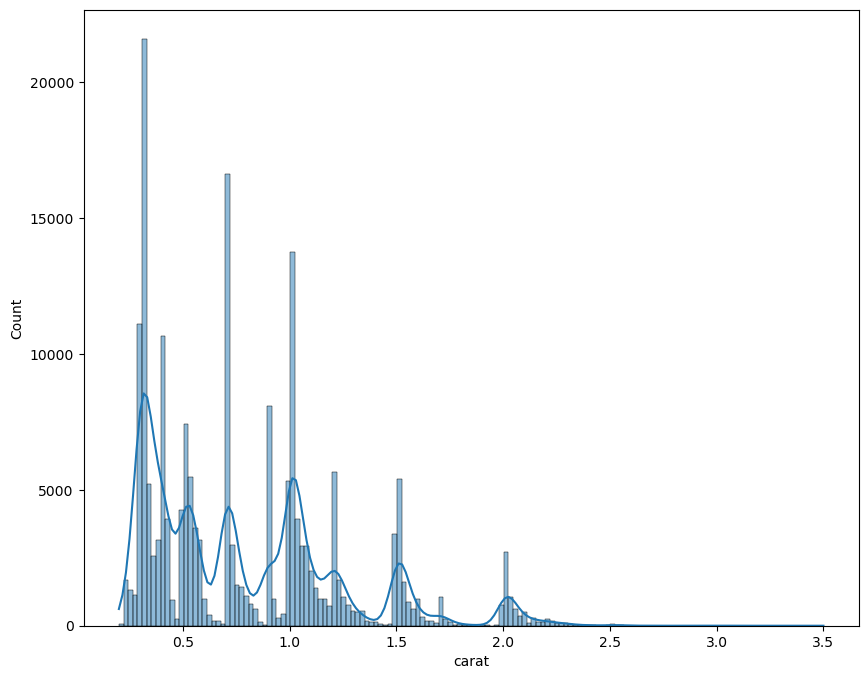

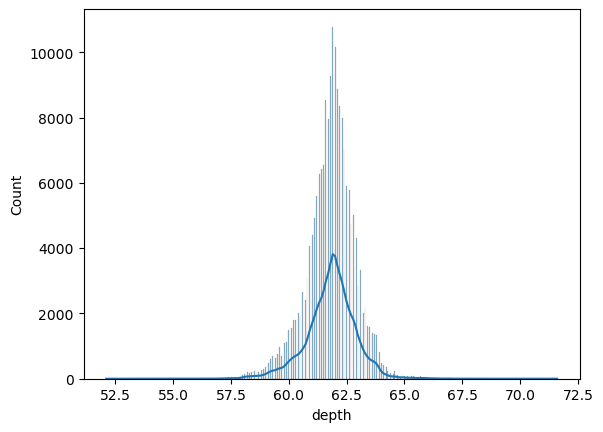

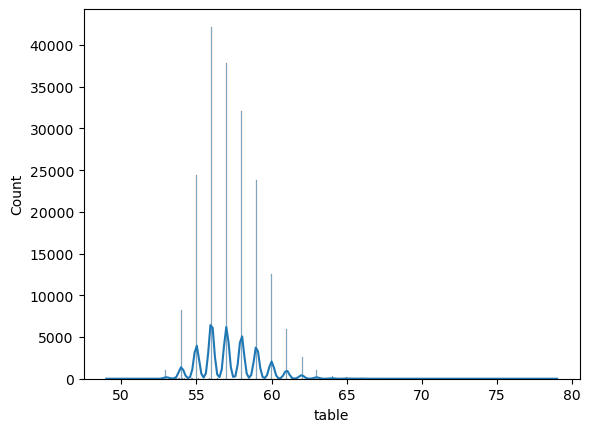

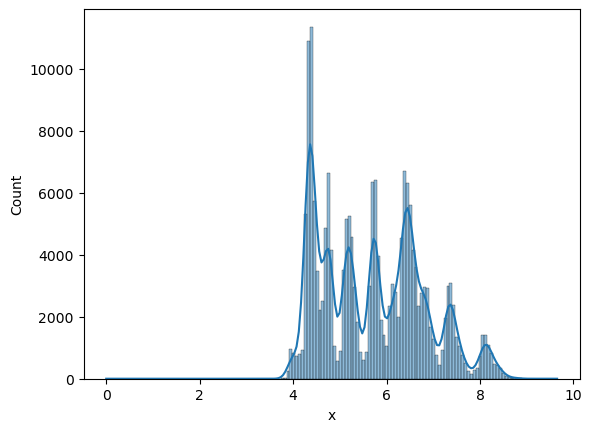

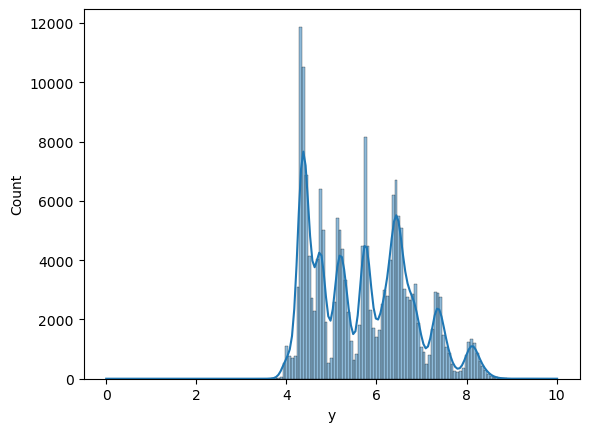

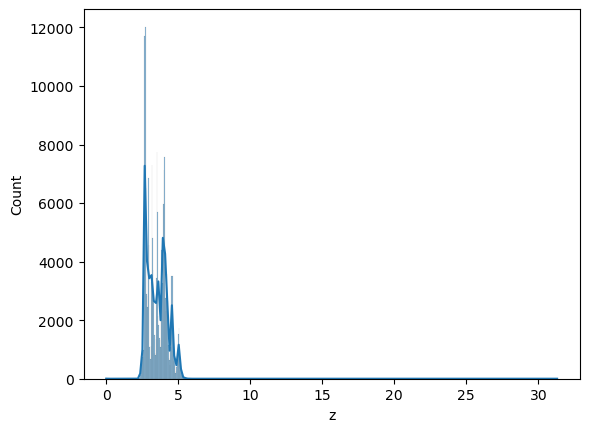

In [106]:
plt.figure(figsize=(10,8))
for i in numerical_cols:
    sns.histplot(data=df[i],kde=True,legend=True)
    plt.show()

C:\Users\Megha\AppData\Local\Temp\ipykernel_14708\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

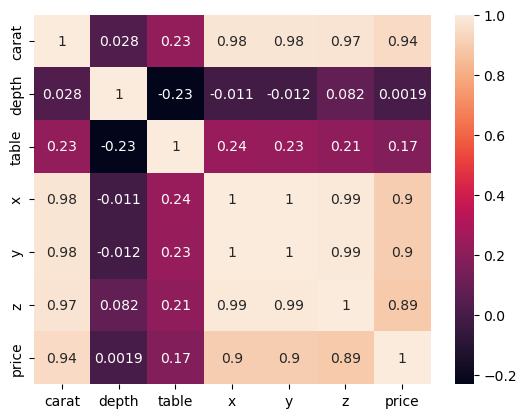

In [107]:
sns.heatmap(df.corr(),annot=True)

In [108]:
def find_corr(x,thresh):
    x1 = x.corr()
    col=[]
    col_name=[]
    for i in range(len(x1)-1):
        for j in np.arange(i+1,len(x1)-1):
            if x1.iloc[i,j]>thresh:
                col.append(j)
                col_name.append(x.columns[j])
                continue
    return col,col_name          


In [109]:
find_corr(df[numerical_cols],0.9)

([3, 4, 4], ['x', 'y', 'y'])

In [110]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [111]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [112]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [113]:
# Giving ranks to each categorical feature
cut_map = {1:'Fair',2:'Good',3:'Very Good',4:'Premium',5:'Ideal'}
clarity_map = {"T1":1,"ST2":2,"ST1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"I1":8}
color_map = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6}

In [114]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [115]:
# when doing with pipeline following procedures would be done. Arrange in rank order.
cut_cateogry = ['Fair','Good','Very Good','Premium','Ideal']
clarity_category = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
color_category = ['D','E','F','G','H','I','J']

In [116]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [117]:
#Numerical Pipeline
numerical_pipeline = Pipeline(
                    steps=[('imputer',SimpleImputer(strategy ='median')),
                          ('scaler',StandardScaler())]
                        )

#Categorical Pipeline
categorical_pipeline = Pipeline(
                        steps=[('imputer',SimpleImputer(strategy ='most_frequent')),
                            ('ordinalencoder',OrdinalEncoder(categories=[cut_cateogry,color_category,clarity_category])),
                            ('scaler',StandardScaler())
                                ]
)

preprocessor = ColumnTransformer([
                        ('numerical_pipeline',numerical_pipeline,numerical_cols),
                        ('categorical_pipeline',categorical_pipeline,category_cols)]
)

In [118]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=33)

In [126]:
xtrain = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())

In [120]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [121]:
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [122]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [127]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(xtrain,ytrain)

    #Make Predictions
    y_pred=model.predict(xtest)

    mae, rmse, r2_square=evaluate_model(ytest,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1004.4751433748798
MAE: 676.2707344857541
R2 score 93.7494129633959


Lasso
Model Training Performance
RMSE: 1004.666911004361
MAE: 677.574065315681
R2 score 93.74702609561355


Ridge
Model Training Performance
RMSE: 1004.4782111354655
MAE: 676.3039197782737
R2 score 93.74937478358835


Elasticnet
Model Training Performance
RMSE: 1523.7955878976024
MAE: 1065.339178705916
R2 score 85.61546451314001


